In [1]:
!pip install geopandas folium scikit-learn requests

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import requests

plt.style.use("seaborn-v0_8")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
from io import StringIO

data = """
State,Year,Total_Accidents,Fatal_Accidents,Persons_Killed,Persons_Injured
Andhra Pradesh,2019,21692,7310,7729,20763
Bihar,2019,10721,4521,4746,6654
Delhi,2019,5876,1433,1463,5128
Gujarat,2019,16157,5638,5957,14789
Haryana,2019,10463,4470,4646,9453
Karnataka,2019,39723,10478,11390,49792
Kerala,2019,41583,4140,4402,42640
Maharashtra,2019,30825,12216,13154,28906
Rajasthan,2019,24072,10340,10863,22156
Tamil Nadu,2019,57432,10825,11268,58970
Uttar Pradesh,2019,37285,19160,22116,31417
West Bengal,2019,10794,4032,4311,9754
"""

df = pd.read_csv(StringIO(data))
df.head()

,State,Year,Total_Accidents,Fatal_Accidents,Persons_Killed,Persons_Injured
0,Andhra Pradesh,2019,21692,7310,7729,20763
1,Bihar,2019,10721,4521,4746,6654
2,Delhi,2019,5876,1433,1463,5128
3,Gujarat,2019,16157,5638,5957,14789
4,Haryana,2019,10463,4470,4646,9453


In [8]:
save_path = "/content/drive/MyDrive/Urban-Accident-Risk-Analysis/datasets/accidents_india.csv"
df.to_csv(save_path, index=False)

save_path

'/content/drive/MyDrive/Urban-Accident-Risk-Analysis/datasets/accidents_india.csv'

In [9]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            12 non-null     object
 1   Year             12 non-null     int64 
 2   Total_Accidents  12 non-null     int64 
 3   Fatal_Accidents  12 non-null     int64 
 4   Persons_Killed   12 non-null     int64 
 5   Persons_Injured  12 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 708.0+ bytes


,0
State,0
Year,0
Total_Accidents,0
Fatal_Accidents,0
Persons_Killed,0
Persons_Injured,0


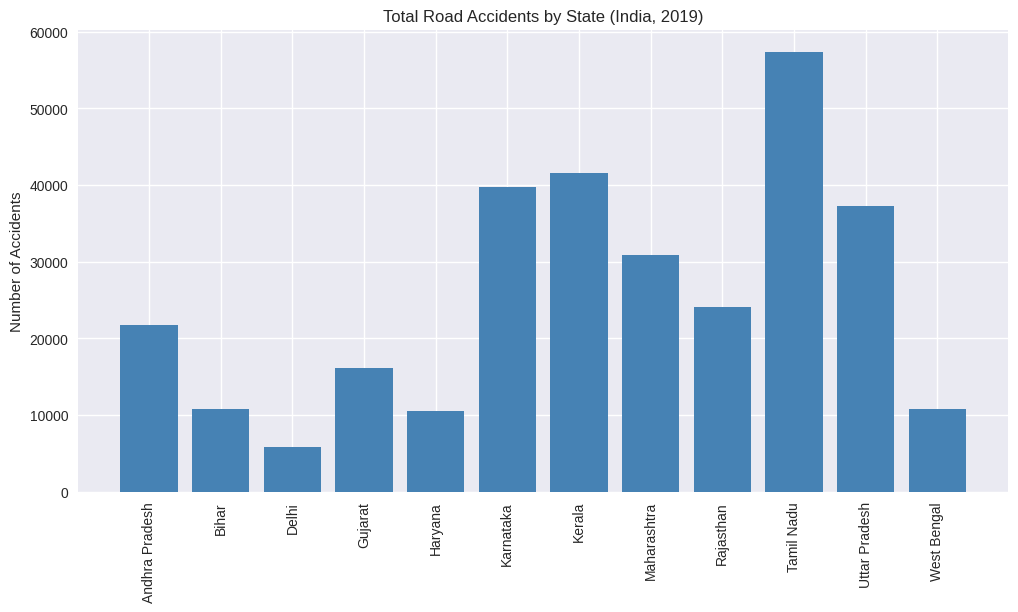

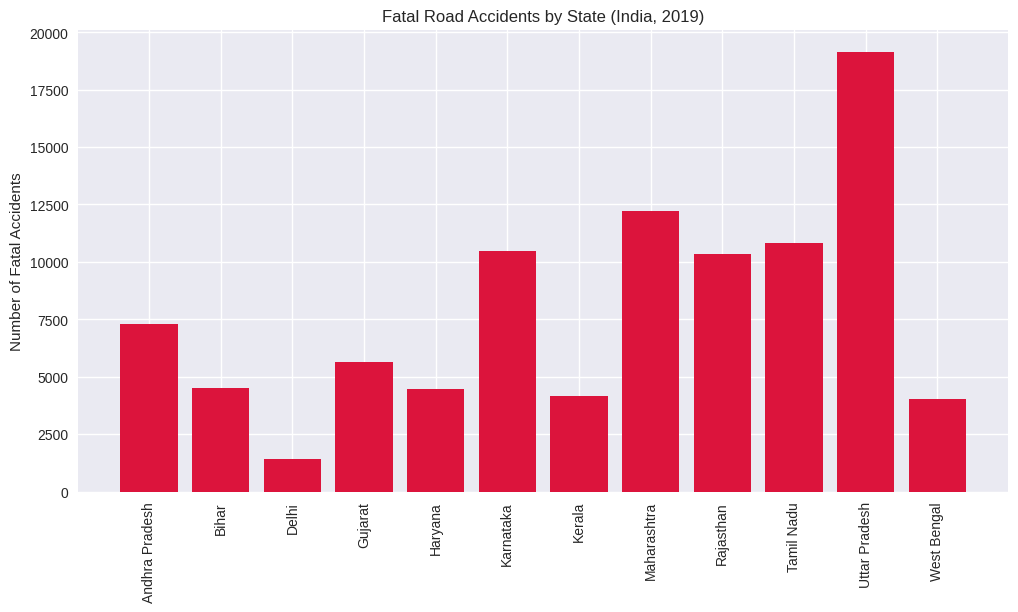

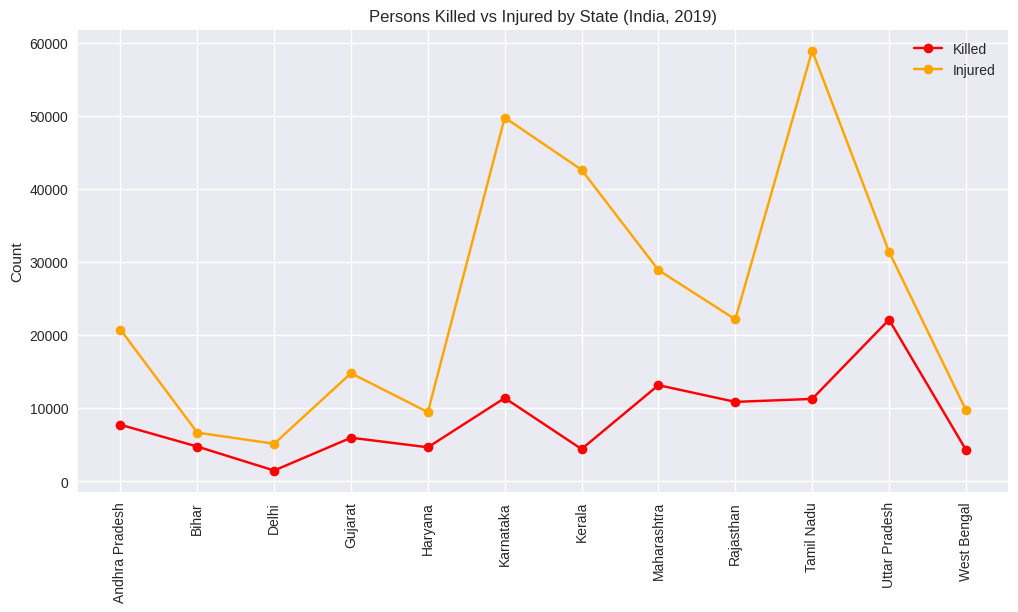

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(df['State'], df['Total_Accidents'], color='steelblue')
plt.xticks(rotation=90)
plt.title("Total Road Accidents by State (India, 2019)")
plt.ylabel("Number of Accidents")
plt.show()


plt.figure(figsize=(12,6))
plt.bar(df['State'], df['Fatal_Accidents'], color='crimson')
plt.xticks(rotation=90)
plt.title("Fatal Road Accidents by State (India, 2019)")
plt.ylabel("Number of Fatal Accidents")
plt.show()



plt.figure(figsize=(12,6))
plt.plot(df['State'], df['Persons_Killed'], marker='o', label='Killed', color='red')
plt.plot(df['State'], df['Persons_Injured'], marker='o', label='Injured', color='orange')
plt.xticks(rotation=90)
plt.title("Persons Killed vs Injured by State (India, 2019)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [12]:
import numpy as np

# Normalize the key columns
df['Accident_Score'] = (df['Total_Accidents'] - df['Total_Accidents'].min()) / (df['Total_Accidents'].max() - df['Total_Accidents'].min())
df['Fatality_Score'] = (df['Fatal_Accidents'] - df['Fatal_Accidents'].min()) / (df['Fatal_Accidents'].max() - df['Fatal_Accidents'].min())
df['Death_Score'] = (df['Persons_Killed'] - df['Persons_Killed'].min()) / (df['Persons_Killed'].max() - df['Persons_Killed'].min())

# Weighted Risk Score (you can tune weights later)
df['Risk_Score'] = (0.4 * df['Accident_Score']) + (0.3 * df['Fatality_Score']) + (0.3 * df['Death_Score'])

df[['State', 'Risk_Score']].sort_values(by='Risk_Score', ascending=False)

,State,Risk_Score
10,Uttar Pradesh,0.843688
9,Tamil Nadu,0.701369
5,Karnataka,0.559872
7,Maharashtra,0.545873
8,Rajasthan,0.428453
6,Kerala,0.365537
0,Andhra Pradesh,0.313186
3,Gujarat,0.216207
1,Bihar,0.137537
4,Haryana,0.133220


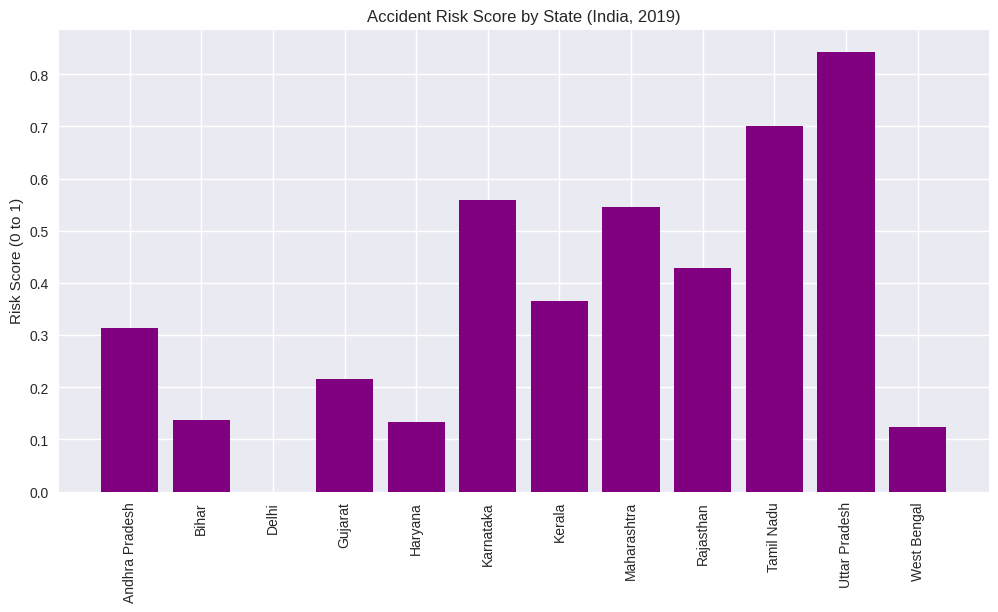

In [13]:
plt.figure(figsize=(12,6))
plt.bar(df['State'], df['Risk_Score'], color='purple')
plt.xticks(rotation=90)
plt.title("Accident Risk Score by State (India, 2019)")
plt.ylabel("Risk Score (0 to 1)")
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = df[['Total_Accidents', 'Fatal_Accidents', 'Persons_Killed', 'Persons_Injured']]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

df[['State', 'Cluster']]

,State,Cluster
0,Andhra Pradesh,0
1,Bihar,0
2,Delhi,0
3,Gujarat,0
4,Haryana,0
5,Karnataka,1
6,Kerala,2
7,Maharashtra,1
8,Rajasthan,0
9,Tamil Nadu,1


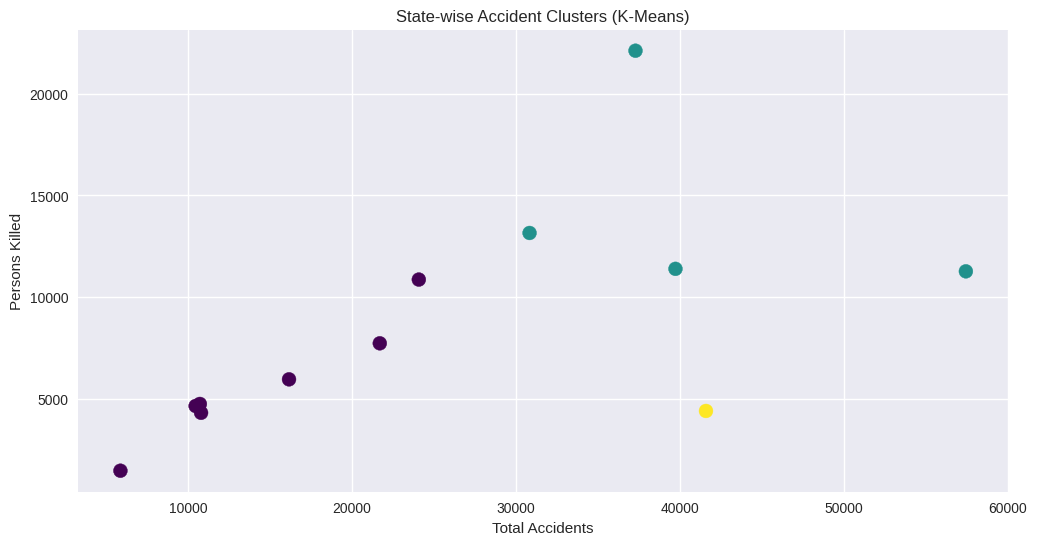

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(df['Total_Accidents'], df['Persons_Killed'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel("Total Accidents")
plt.ylabel("Persons Killed")
plt.title("State-wise Accident Clusters (K-Means)")
plt.show()

In [16]:
df.groupby('Cluster')[['Total_Accidents', 'Fatal_Accidents', 'Persons_Killed', 'Persons_Injured']].mean()

,Total_Accidents,Fatal_Accidents,Persons_Killed,Persons_Injured
Cluster,,,,
0,14253.571429,5392.00,5673.571429,12671.00
1,41316.250000,13169.75,14482.000000,42271.25
2,41583.000000,4140.00,4402.000000,42640.00


In [17]:
cluster_labels = {
    0: "Low Risk",
    1: "Medium Risk",
    2: "High Risk"
}

df['Risk_Level'] = df['Cluster'].map(cluster_labels)
df[['State', 'Risk_Level']]

,State,Risk_Level
0,Andhra Pradesh,Low Risk
1,Bihar,Low Risk
2,Delhi,Low Risk
3,Gujarat,Low Risk
4,Haryana,Low Risk
5,Karnataka,Medium Risk
6,Kerala,High Risk
7,Maharashtra,Medium Risk
8,Rajasthan,Low Risk
9,Tamil Nadu,Medium Risk


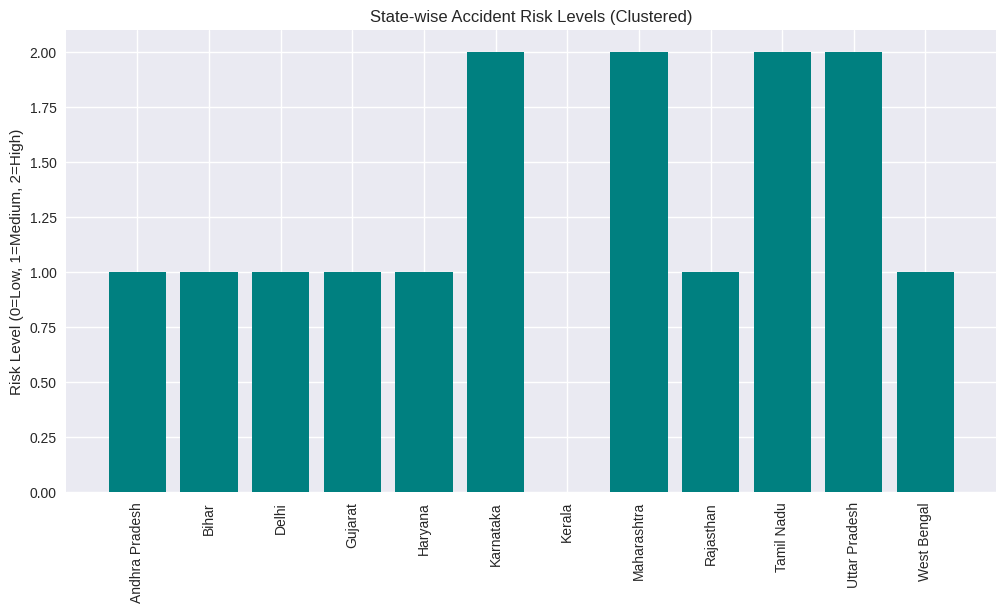

In [18]:
plt.figure(figsize=(12,6))
plt.bar(df['State'], df['Risk_Level'].astype('category').cat.codes, color='teal')
plt.xticks(rotation=90)
plt.title("State-wise Accident Risk Levels (Clustered)")
plt.ylabel("Risk Level (0=Low, 1=Medium, 2=High)")
plt.show()

In [21]:
clean_path = "/content/drive/MyDrive/Urban-Accident-Risk-Analysis/datasets/accidents_cleaned.csv"
df.to_csv(clean_path, index=False)

In [22]:
import joblib

joblib.dump(kmeans, "/content/drive/MyDrive/Urban-Accident-Risk-Analysis/models/kmeans_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/Urban-Accident-Risk-Analysis/models/scaler.pkl")

['/content/drive/MyDrive/Urban-Accident-Risk-Analysis/models/scaler.pkl']

In [23]:
script_path = "/content/drive/MyDrive/Urban-Accident-Risk-Analysis/scripts/data_cleaning.py"

content = """
import pandas as pd

def load_data(path):
    return pd.read_csv(path)

def clean_data(df):
    # Add cleaning steps here if needed
    df = df.drop_duplicates()
    return df

def save_data(df, path):
    df.to_csv(path, index=False)
"""

with open(script_path, "w") as f:
    f.write(content)

script_path

'/content/drive/MyDrive/Urban-Accident-Risk-Analysis/scripts/data_cleaning.py'

In [24]:
script_path = "/content/drive/MyDrive/Urban-Accident-Risk-Analysis/scripts/risk_score.py"

content = """
import pandas as pd

def calculate_risk_score(df):
    # Normalize values
    df['Accident_Score'] = df['Total_Accidents'] / df['Total_Accidents'].max()
    df['Fatality_Score'] = df['Persons_Killed'] / df['Persons_Killed'].max()
    df['Injury_Score'] = df['Persons_Injured'] / df['Persons_Injured'].max()

    # Weighted risk score
    df['Risk_Score'] = (
        0.5 * df['Accident_Score'] +
        0.3 * df['Fatality_Score'] +
        0.2 * df['Injury_Score']
    )

    return df
"""

with open(script_path, "w") as f:
    f.write(content)

script_path

'/content/drive/MyDrive/Urban-Accident-Risk-Analysis/scripts/risk_score.py'

In [25]:
script_path = "/content/drive/MyDrive/Urban-Accident-Risk-Analysis/scripts/clustering.py"

content = """
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def perform_clustering(df, n_clusters=3):
    features = df[['Total_Accidents', 'Fatal_Accidents', 'Persons_Killed', 'Persons_Injured']]

    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_features)

    return df, kmeans, scaler

def assign_risk_labels(df):
    cluster_labels = {
        0: "Low Risk",
        1: "Medium Risk",
        2: "High Risk"
    }
    df['Risk_Level'] = df['Cluster'].map(cluster_labels)
    return df
"""

with open(script_path, "w") as f:
    f.write(content)

script_path

'/content/drive/MyDrive/Urban-Accident-Risk-Analysis/scripts/clustering.py'

In [26]:
script_path = "/content/drive/MyDrive/Urban-Accident-Risk-Analysis/scripts/visualizations.py"

content = """
import matplotlib.pyplot as plt
import seaborn as sns

def plot_accidents_by_state(df):
    plt.figure(figsize=(12,6))
    sns.barplot(x='State', y='Total_Accidents', data=df)
    plt.xticks(rotation=90)
    plt.title("Total Accidents by State")
    plt.show()

def plot_fatalities_by_state(df):
    plt.figure(figsize=(12,6))
    sns.barplot(x='State', y='Persons_Killed', data=df, color='red')
    plt.xticks(rotation=90)
    plt.title("Fatalities by State")
    plt.show()

def plot_clusters(df):
    plt.figure(figsize=(12,6))
    plt.scatter(df['Total_Accidents'], df['Persons_Killed'], c=df['Cluster'], cmap='viridis', s=100)
    plt.xlabel("Total Accidents")
    plt.ylabel("Persons Killed")
    plt.title("State-wise Accident Clusters (K-Means)")
    plt.show()
"""

with open(script_path, "w") as f:
    f.write(content)

script_path

'/content/drive/MyDrive/Urban-Accident-Risk-Analysis/scripts/visualizations.py'